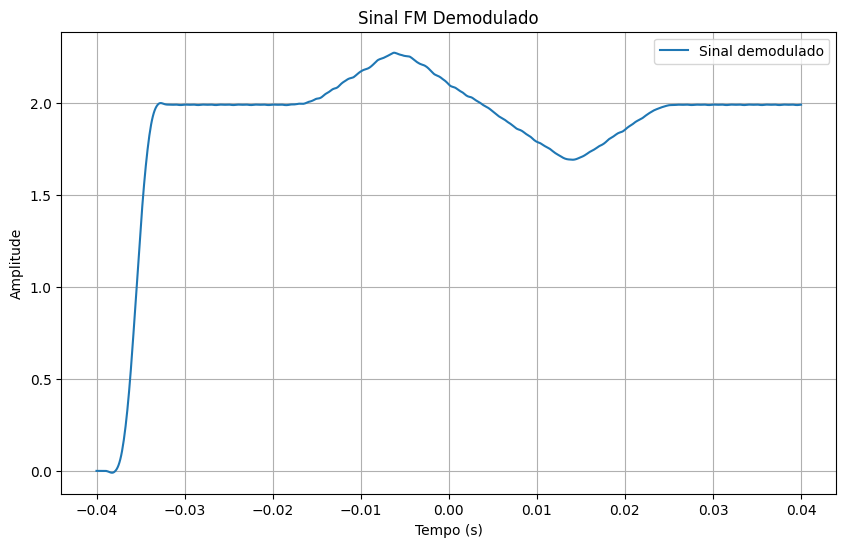

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, fftconvolve

# Parâmetros
ts = 1e-4
t = np.arange(-0.04, 0.04 + ts, ts)  # vetor de tempo
fc = 500  # frequência da portadora

# Sinal modulante triangular
def triangl(x):
    return np.maximum(1 - np.abs(x), 0)

m_sig = triangl((t + 0.01) / 0.01) - triangl((t - 0.01) / 0.01)

# FFT do sinal modulante
Lfft = len(t)
Lfft = 2 ** int(np.ceil(np.log2(Lfft) + 1))
M_fre = np.fft.fftshift(np.fft.fft(m_sig, Lfft))
freqm = np.fft.fftshift(np.fft.fftfreq(Lfft, ts))

# Filtro passa-baixa
B_m = 150  # Banda essencial do sinal em Hz
h = firwin(81, B_m * 2 * ts, window="hamming")  # Filtro FIR

# Parâmetros FM
kf = 160 * np.pi  # Índice de modulação
m_intg = ts * np.cumsum(m_sig)  # Integração do sinal modulante
s_fm = np.cos(2 * np.pi * fc * t + kf * m_intg)  # Sinal FM

# FFT do sinal FM
S_fm = np.fft.fftshift(np.fft.fft(s_fm, Lfft))
freqs = np.fft.fftshift(np.fft.fftfreq(Lfft, ts))

# Demodulação do sinal FM
s_fmdem = np.diff(np.concatenate(([s_fm[0]], s_fm))) / ts / kf  # Derivada do sinal FM
s_fmrec = s_fmdem * (s_fmdem > 0)  # Retificação (meia onda)
s_dec = lfilter(h, 1, s_fmrec)  # Filtragem passa-baixa

# Plotagem do sinal demodulado
plt.figure(figsize=(10, 6))
plt.plot(t, s_dec, label="Sinal demodulado")
plt.title("Sinal FM Demodulado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()
